## Import libraries

In [186]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from tensorflow.keras import Sequential
import random

## Import dataset

In [180]:
(X_train, y_train), (X_test, y_test) = load_data()

In [132]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [133]:
X_train[0].dtype , y_train[0].dtype     # This must be in 'float32' format, else we have to convert it

(dtype('uint8'), dtype('uint8'))

## Visualize random images

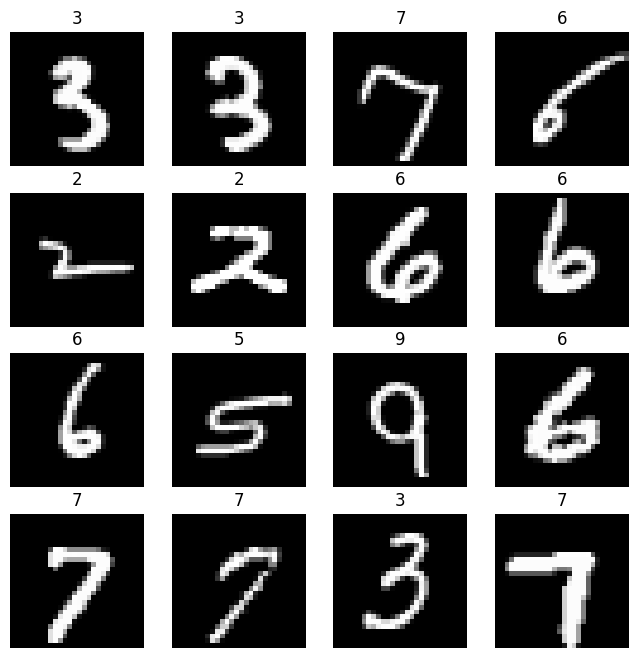

In [134]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (8, 8))

for i in range(4):
    for j in range(4):
        rand_index = random.randint(0, 60_000)
        ax[i][j].imshow(X_train[rand_index], cmap = 'gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(y_train[rand_index])

## Data Preprocessing
- Convert the datatype from `uinit8` to `float32`
- Normalize the pixels of the images (0 to 1)
- Create a data pipeline using `tf.data.Dataset` pipeline
- Create batches and prefetch for and fast computations

In [135]:
X_train_data = tf.data.Dataset.from_tensor_slices(X_train)
X_test_data = tf.data.Dataset.from_tensor_slices(X_test)
y_train_data = tf.data.Dataset.from_tensor_slices(y_train)
y_test_data = tf.data.Dataset.from_tensor_slices(y_test)

In [136]:
X_train_processed = X_train_data.map(lambda x: tf.cast(x/255, dtype = tf.float32), num_parallel_calls = tf.data.AUTOTUNE)
y_train_processed = y_train_data.map(lambda y: tf.cast(y, dtype = tf.float32), num_parallel_calls = tf.data.AUTOTUNE)
X_test_processed = X_test_data.map(lambda x: tf.cast(x/255, dtype = tf.float32), num_parallel_calls = tf.data.AUTOTUNE)
y_test_processed = y_test_data.map(lambda y: tf.cast(y, dtype = tf.float32), num_parallel_calls = tf.data.AUTOTUNE_data)

In [137]:
train_set = tf.data.Dataset.zip((X_train_processed, y_train_processed))
test_set = tf.data.Dataset.zip((X_test_processed, y_test_processed))

In [138]:
train_set = train_set.batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)
test_set = test_set.batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)

## Model Creation

In [139]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', strides = 1, input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'same', strides = 1))
model.add(Conv2D(filters = 32, kernel_size = (4, 4), padding = 'valid', strides = 1, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid', strides = 1))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 10, activation = 'softmax'))

In [140]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    metrics = ['accuracy']
)

In [141]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 32)        32800     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 15488)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

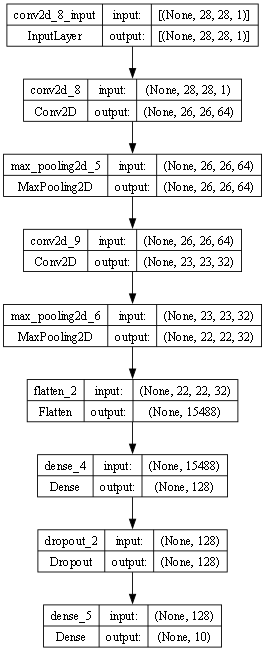

In [142]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 64)

In [143]:
model_hist = model.fit(x = train_set, validation_data = test_set, epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 51s 27ms/step - loss: 0.2861 - accuracy: 0.9155 - val_loss: 0.1000 - val_accuracy: 0.9700
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1622 - accuracy: 0.9524 - val_loss: 0.0794 - val_accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1477 - accuracy: 0.9570 - val_loss: 0.0906 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1373 - accuracy: 0.9599 - val_loss: 0.1125 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1293 - accuracy: 0.9627 - val_loss: 0.0887 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1250 - accuracy: 0.9632 - val_loss: 0.1090 - val_accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1200 - accuracy: 0.9643 - val_loss: 0.1101 - val_accura

### Evaluating Model performance

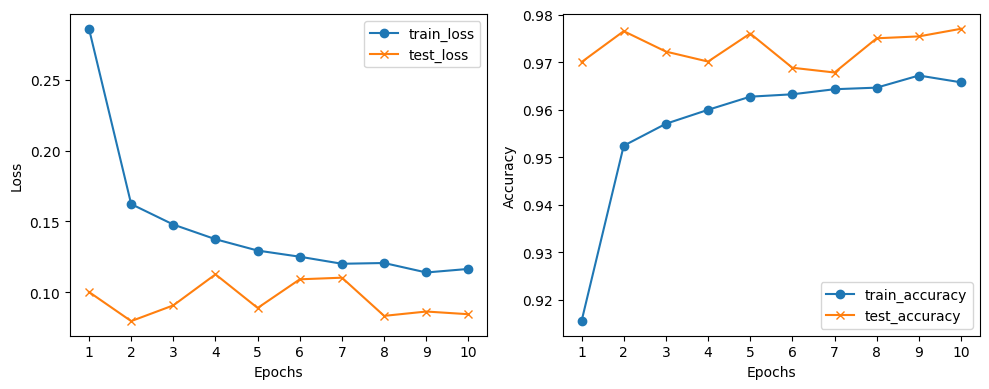

In [161]:
history = model_hist.history
epochs = model_hist.epoch

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], label = 'train_loss', marker = 'o')
plt.plot(epochs, history['val_loss'], label = 'test_loss', marker = 'x')
plt.xticks(np.arange(0, 10), np.array(epochs)+1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, history['accuracy'], label = 'train_accuracy', marker = 'o')
plt.plot(epochs, history['val_accuracy'], label = 'test_accuracy', marker = 'x')
plt.xticks(np.arange(0, 10), np.array(epochs)+1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

In [162]:
model.evaluate(test_set)

313/313 [==============================] - 2s 7ms/step - loss: 0.0843 - accuracy: 0.9770


[0.08430608361959457, 0.9769999980926514]

In [184]:
y_pred = np.argmax(model.predict(test_set), axis = 1)
y_pred

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [192]:
print(f"Accuracy score: {np.round(accuracy_score(y_test, y_pred), 3)}")
print(f"Recall score: {np.round(recall_score(y_test, y_pred, average = 'macro'), 3)}")
print(f"Precision score: {np.round(precision_score(y_test, y_pred, average = 'macro'), 3)}")
print(f"F1 score: {np.round(f1_score(y_test, y_pred, average = 'macro'), 3)}")

Accuracy score: 0.977
Recall score: 0.977
Precision score: 0.977
F1 score: 0.977


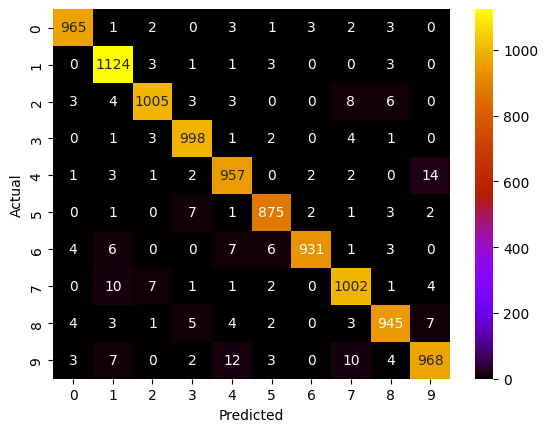

In [195]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'gnuplot');
plt.xlabel("Predicted")
plt.ylabel("Actual");